# Name: Deepthi I
# Registration No.: 22011103010


# Objectives

- Use scikit-learn
- Use real_estate.csv
- Perform linear regression and predict price based on the features

- Using combinations of data try multiple regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate.csv')

df['UniqueNum'] = [_ for _ in range(len(df))]
df = df.drop("Address", axis = 1)

Cleaning the dataset

In [3]:
def assign_year_category(year) -> int:
    if year < 1800:
        return 8
    elif 1800 <= year < 1850:
        return 7
    elif 1850 <= year < 1900:
        return 6
    elif 1900 <= year < 1920:
        return 5
    elif 1920 <= year < 1950:
        return 4
    elif 1950 <= year < 1980:
        return 3
    elif 1980 <= year < 2000:
        return 2
    elif 2000 <= year < 2023:
        return 1
    else:
        return 0
    
df['YearBuilt2'] = df['YearBuilt'].apply(assign_year_category)
df = df.drop('YearBuilt', axis = 1)

scaler = MinMaxScaler()
df[['price_norm', 'land_size_norm']] = scaler.fit_transform(df[['Price', 'Landsize']])

scaler = StandardScaler()
df[['price_norm', 'land_size_norm']] = scaler.fit_transform(df[['Price', 'Landsize']])

In [4]:
l_encoder = LabelEncoder()
df['EncodedUniqueNum'] = l_encoder.fit_transform(df['UniqueNum'])
df['EncodedRegionname'] = l_encoder.fit_transform(df['Regionname'])
df['EncodedSuburb'] = l_encoder.fit_transform(df['Suburb'])
df['EncodedType'] = l_encoder.fit_transform(df['Type'])
df = df.drop('UniqueNum', axis = 1)
df = df.drop('Regionname', axis = 1)
df = df.drop('Suburb', axis = 1)
df = df.drop('Type', axis = 1)
df = df.dropna()

features = df.to_numpy()
covar = np.cov(features)
print(covar)

print(df)

[[1.82528638e+11 1.27646467e+11 1.80679311e+11 ... 1.44137412e+11
  3.08163751e+11 1.58321244e+11]
 [1.27646467e+11 8.92661044e+10 1.26353190e+11 ... 1.00798600e+11
  2.15505984e+11 1.10717679e+11]
 [1.80679311e+11 1.26353190e+11 1.78848722e+11 ... 1.42677061e+11
  3.05041532e+11 1.56717187e+11]
 ...
 [1.44137412e+11 1.00798600e+11 1.42677061e+11 ... 1.13836122e+11
  2.43362800e+11 1.25036680e+11]
 [3.08163751e+11 2.15505984e+11 3.05041532e+11 ... 2.43362800e+11
  5.20289036e+11 2.67309421e+11]
 [1.58321244e+11 1.10717679e+11 1.56717187e+11 ... 1.25036680e+11
  2.67309421e+11 1.37339427e+11]]
       Rooms    Price  Bedroom2  Bathroom  Landsize  YearBuilt2  price_norm  \
0          2  1480000         2         1       202           0    0.632448   
1          2  1035000         2         1       156           5   -0.063640   
2          3  1465000         3         2       134           5    0.608984   
3          3   850000         3         2        94           0   -0.353025   
4    

## Simple linear regression

- Trying to predict the landsize of the house based on its price

In [5]:
X = np.array(df["Price"]).reshape(-1, 1) # can also use price_norm to use the normalized values
print(X)
y = np.array(df["Landsize"]) # can also use land_size_norm to use the normalized values
print(y)

model = LinearRegression()
model.fit(X, y)

[[1480000]
 [1035000]
 [1465000]
 ...
 [1170000]
 [2500000]
 [1285000]]
[202 156 134 ... 436 866 362]


LinearRegression()

In [6]:
X_new = np.array([2000000]).reshape(-1, 1)
y_pred = model.predict(X_new)
print("Prediction of new price for X_new = {} is {}".format(X_new, y_pred))

Prediction of new price for X_new = [[2000000]] is [774.82333246]


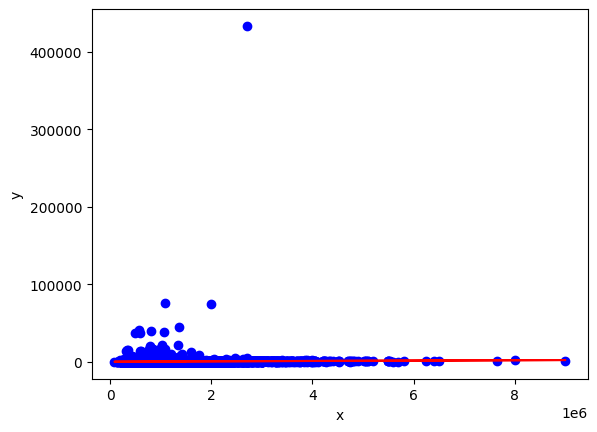

In [7]:
plt.scatter(X, y, color = "blue")
plt.plot(X, model.predict(X), color = "red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Multiple linear regression

- Trying to predict landsize of the house using price and the number of bedrooms it has.

In [8]:
X = np.array(df.loc[:, ['price_norm', 'Bedroom2']].values) # can also use price_norm to use the normalized values
y = np.array(df["Landsize"]) # can also use land_size_norm to use the normalized values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(y_pred)

[596.38488847 426.31253231 529.11591957 ... 526.71946255 414.75067828
 639.06663477]


- Calculating the mean squared error and R2 score

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error =", mse)
print("R2 score =", r2)

Mean squared error = 48548904.28521491
R2 score = 0.0003085798410912277
